In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Scrap the Data

In [2]:
url = 'https://www.airlinequality.com/airline-reviews/british-airways/?sortby=post_date%3ADesc&pagesize=3731#mainMenu'

response = requests.get(url)
page_content = response.content
soup = BeautifulSoup(page_content, 'html.parser')

In [3]:

# Find all instances of the review articles
review_articles = soup.find_all('article', class_=lambda value: value and 'comp_media-review-rated' in value)

# Initialize an empty list to store review data
all_reviews = []

# Loop through each review article and extract data
for review_article in review_articles:
    review_data = {
        'Title': review_article.find('h2', class_='text_header').text.strip(),
        'Author': review_article.find('span', itemprop='name').text.strip(),
        'Location': review_article.find('h3', class_='text_sub_header').contents[2].strip(),
        'Date': review_article.find('time', itemprop='datePublished')['datetime'].strip(),
        'Review': review_article.find('div', itemprop='reviewBody').text.strip(),
    }

    # Extract rating values
    rating_elements = review_article.find('div', class_='rating-10').find_all('span')
    review_data['Rating'] = int(rating_elements[0].text.strip()) if rating_elements else None
    # Extract review statistics
    review_stats_table = review_article.find('table', class_='review-ratings')
    for row in review_stats_table.find_all('tr'):
        header = row.find('td', class_='review-rating-header')
        value = row.find('td', class_='review-value')
        if header and value:
            review_data[header.text.strip()] = value.text.strip()

    # Append the review data to the list
    all_reviews.append(review_data)

# Create DataFrame from the list of reviews
df = pd.DataFrame(all_reviews)

# Display the DataFrame
print(df)

                                        Title             Author  \
0                     "Zero customer service"           A Karsin   
1     "baggage arrival nearly took 1.5 hours"     Muhammad Yasin   
2                    "Overall very satisfied"            S Keane   
3               "airline is a total disgrace"         Neil Jones   
4          "we were pleased with the service"            R Dayle   
...                                       ...                ...   
3726          British Airways customer review           S Luqman   
3727          British Airways customer review            D Smith   
3728          British Airways customer review           W Benson   
3729          British Airways customer review  Michael Dielissen   
3730          British Airways customer review         Nick Berry   

              Location        Date  \
0            (Ireland)  2024-01-15   
1     (United Kingdom)  2024-01-12   
2     (United Kingdom)  2024-01-12   
3              (Spain)  2024-01

In [4]:
df

,Title,Author,Location,Date,Review,Rating,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft
0,"""Zero customer service""",A Karsin,(Ireland),2024-01-15,✅ Trip Verified | The plane was extremely dir...,1.0,Family Leisure,Economy Class,Dublin to London Heathrow,January 2024,no,NaN
1,"""baggage arrival nearly took 1.5 hours""",Muhammad Yasin,(United Kingdom),2024-01-12,Not Verified | Overall journey wasn’t bad howe...,4.0,Business,Economy Class,Glasgow to London,January 2024,no,NaN
2,"""Overall very satisfied""",S Keane,(United Kingdom),2024-01-12,✅ Trip Verified | Overall very satisfied. Gro...,9.0,Solo Leisure,Economy Class,Vancouver to London,January 2024,yes,A350-1000
3,"""airline is a total disgrace""",Neil Jones,(Spain),2024-01-09,✅ Trip Verified | As always when I fly BA it ...,1.0,Business,Business Class,Heathrow to Madrid,October 2023,no,A320
4,"""we were pleased with the service""",R Dayle,(United Kingdom),2024-01-07,✅ Trip Verified | First time using BA busines...,9.0,Couple Leisure,Business Class,London to New York,November 2023,yes,Boeing 777 -200
...,...,...,...,...,...,...,...,...,...,...,...,...
3726,British Airways customer review,S Luqman,(United Kingdom),2012-08-29,Just got back from Bridgetown Barbados flying ...,4.0,NaN,Economy Class,NaN,NaN,no,NaN
3727,British Airways customer review,D Smith,(United Kingdom),2012-08-29,LHR-JFK-LAX-LHR. Check in was ok apart from be...,4.0,NaN,Economy Class,NaN,NaN,no,NaN
3728,British Airways customer review,W Benson,(United Kingdom),2012-08-29,HKG-LHR in New Club World on Boeing 777-300 - ...,6.0,NaN,Business Class,NaN,NaN,yes,NaN
3729,British Airways customer review,Michael Dielissen,(Canada),2012-08-29,YYZ to LHR - July 2012 - I flew overnight in p...,8.0,NaN,Premium Economy,NaN,NaN,yes,NaN


In [1]:
#save raw data locally
df.to_csv('raw_data.csv', index = False)

NameError: name 'df' is not defined

In [3]:
#read data from local drive
data = pd.read_csv('raw_data.csv')

In [4]:
data

,Title,Author,Location,Date,Review,Rating,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft
0,"""Zero customer service""",A Karsin,(Ireland),2024-01-15,✅ Trip Verified | The plane was extremely dir...,1.0,Family Leisure,Economy Class,Dublin to London Heathrow,January 2024,no,NaN
1,"""baggage arrival nearly took 1.5 hours""",Muhammad Yasin,(United Kingdom),2024-01-12,Not Verified | Overall journey wasn’t bad howe...,4.0,Business,Economy Class,Glasgow to London,January 2024,no,NaN
2,"""Overall very satisfied""",S Keane,(United Kingdom),2024-01-12,✅ Trip Verified | Overall very satisfied. Gro...,9.0,Solo Leisure,Economy Class,Vancouver to London,January 2024,yes,A350-1000
3,"""airline is a total disgrace""",Neil Jones,(Spain),2024-01-09,✅ Trip Verified | As always when I fly BA it ...,1.0,Business,Business Class,Heathrow to Madrid,October 2023,no,A320
4,"""we were pleased with the service""",R Dayle,(United Kingdom),2024-01-07,✅ Trip Verified | First time using BA busines...,9.0,Couple Leisure,Business Class,London to New York,November 2023,yes,Boeing 777 -200
...,...,...,...,...,...,...,...,...,...,...,...,...
3726,British Airways customer review,S Luqman,(United Kingdom),2012-08-29,Just got back from Bridgetown Barbados flying ...,4.0,NaN,Economy Class,NaN,NaN,no,NaN
3727,British Airways customer review,D Smith,(United Kingdom),2012-08-29,LHR-JFK-LAX-LHR. Check in was ok apart from be...,4.0,NaN,Economy Class,NaN,NaN,no,NaN
3728,British Airways customer review,W Benson,(United Kingdom),2012-08-29,HKG-LHR in New Club World on Boeing 777-300 - ...,6.0,NaN,Business Class,NaN,NaN,yes,NaN
3729,British Airways customer review,Michael Dielissen,(Canada),2012-08-29,YYZ to LHR - July 2012 - I flew overnight in p...,8.0,NaN,Premium Economy,NaN,NaN,yes,NaN


## Data Cleaning & EDA 

In [5]:
#check columns
data.columns

Index(['Title', 'Author', 'Location', 'Date', 'Review', 'Rating',
       'Type Of Traveller', 'Seat Type', 'Route', 'Date Flown', 'Recommended',
       'Aircraft'],
      dtype='object')

In [6]:
data.info

<bound method DataFrame.info of                                         Title             Author  \
0                     "Zero customer service"           A Karsin   
1     "baggage arrival nearly took 1.5 hours"     Muhammad Yasin   
2                    "Overall very satisfied"            S Keane   
3               "airline is a total disgrace"         Neil Jones   
4          "we were pleased with the service"            R Dayle   
...                                       ...                ...   
3726          British Airways customer review           S Luqman   
3727          British Airways customer review            D Smith   
3728          British Airways customer review           W Benson   
3729          British Airways customer review  Michael Dielissen   
3730          British Airways customer review         Nick Berry   

              Location        Date  \
0            (Ireland)  2024-01-15   
1     (United Kingdom)  2024-01-12   
2     (United Kingdom)  2024-01-12   

In [7]:
data.isna().sum()

Title                   0
Author                  0
Location                2
Date                    0
Review                  0
Rating                  5
Type Of Traveller     768
Seat Type               2
Route                 772
Date Flown            775
Recommended             0
Aircraft             1788
dtype: int64

In [8]:
#remove null valuables in necessary columns
data.dropna(subset = ['Rating'], inplace=True)

In [9]:
data

,Title,Author,Location,Date,Review,Rating,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft
0,"""Zero customer service""",A Karsin,(Ireland),2024-01-15,✅ Trip Verified | The plane was extremely dir...,1.0,Family Leisure,Economy Class,Dublin to London Heathrow,January 2024,no,NaN
1,"""baggage arrival nearly took 1.5 hours""",Muhammad Yasin,(United Kingdom),2024-01-12,Not Verified | Overall journey wasn’t bad howe...,4.0,Business,Economy Class,Glasgow to London,January 2024,no,NaN
2,"""Overall very satisfied""",S Keane,(United Kingdom),2024-01-12,✅ Trip Verified | Overall very satisfied. Gro...,9.0,Solo Leisure,Economy Class,Vancouver to London,January 2024,yes,A350-1000
3,"""airline is a total disgrace""",Neil Jones,(Spain),2024-01-09,✅ Trip Verified | As always when I fly BA it ...,1.0,Business,Business Class,Heathrow to Madrid,October 2023,no,A320
4,"""we were pleased with the service""",R Dayle,(United Kingdom),2024-01-07,✅ Trip Verified | First time using BA busines...,9.0,Couple Leisure,Business Class,London to New York,November 2023,yes,Boeing 777 -200
...,...,...,...,...,...,...,...,...,...,...,...,...
3726,British Airways customer review,S Luqman,(United Kingdom),2012-08-29,Just got back from Bridgetown Barbados flying ...,4.0,NaN,Economy Class,NaN,NaN,no,NaN
3727,British Airways customer review,D Smith,(United Kingdom),2012-08-29,LHR-JFK-LAX-LHR. Check in was ok apart from be...,4.0,NaN,Economy Class,NaN,NaN,no,NaN
3728,British Airways customer review,W Benson,(United Kingdom),2012-08-29,HKG-LHR in New Club World on Boeing 777-300 - ...,6.0,NaN,Business Class,NaN,NaN,yes,NaN
3729,British Airways customer review,Michael Dielissen,(Canada),2012-08-29,YYZ to LHR - July 2012 - I flew overnight in p...,8.0,NaN,Premium Economy,NaN,NaN,yes,NaN


In [10]:
#create a fuction that plots bargraphs
def plot_review_stats(data, column_name):
    ax = data[column_name].value_counts().sort_index() \
        .plot(kind='bar',
              title=f'Count of Reviews by {column_name}',
              figsize=(10, 5))
    ax.set_xlabel(f'{column_name}')
    plt.show()

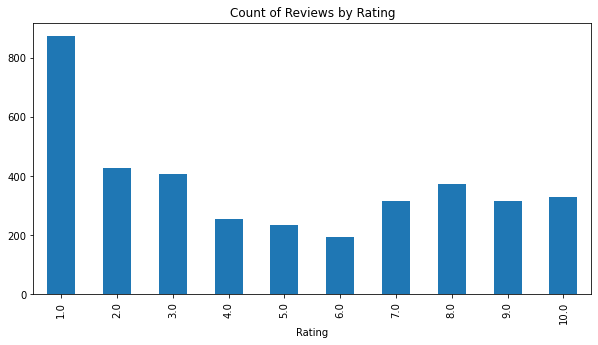

In [11]:
plot_review_stats(data,'Rating')

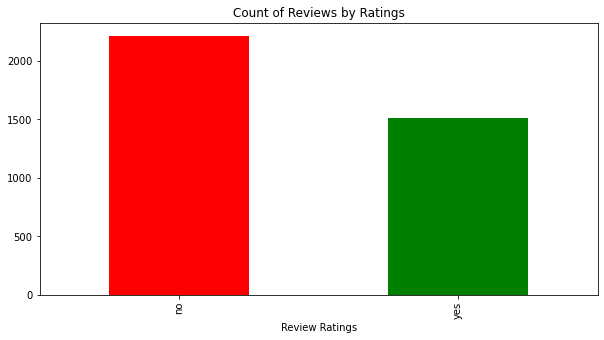

In [12]:
ax = data['Recommended'].value_counts().sort_index() \
    .plot(kind='bar', color = ['red','green'],
          title='Count of Reviews by Ratings',
          figsize=(10, 5))
ax.set_xlabel('Review Ratings')
plt.show()

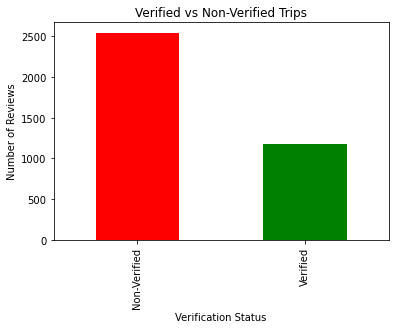

In [13]:
# Plot a graph between verified and non-verified trips
# Add a new column to categorize reviews as "Verified" or "Non-Verified"
data['Verification Status'] = data['Review'].apply(lambda x: 'Verified' if 'Trip Verified' in x else 'Non-Verified' if 'Verified' not in x else 'Non-Verified')

# Count the occurrences of each category
verification_counts = data['Verification Status'].value_counts()

# Plot a bar graph
verification_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Verified vs Non-Verified Trips')
plt.xlabel('Verification Status')
plt.ylabel('Number of Reviews')
plt.show()

### Using Verified Reviews 

In [14]:
trip_verified_data = data[data["Review"].str.contains("Trip Verified", case=False)]

In [15]:
trip_verified_data

,Title,Author,Location,Date,Review,Rating,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verification Status
0,"""Zero customer service""",A Karsin,(Ireland),2024-01-15,✅ Trip Verified | The plane was extremely dir...,1.0,Family Leisure,Economy Class,Dublin to London Heathrow,January 2024,no,NaN,Verified
2,"""Overall very satisfied""",S Keane,(United Kingdom),2024-01-12,✅ Trip Verified | Overall very satisfied. Gro...,9.0,Solo Leisure,Economy Class,Vancouver to London,January 2024,yes,A350-1000,Verified
3,"""airline is a total disgrace""",Neil Jones,(Spain),2024-01-09,✅ Trip Verified | As always when I fly BA it ...,1.0,Business,Business Class,Heathrow to Madrid,October 2023,no,A320,Verified
4,"""we were pleased with the service""",R Dayle,(United Kingdom),2024-01-07,✅ Trip Verified | First time using BA busines...,9.0,Couple Leisure,Business Class,London to New York,November 2023,yes,Boeing 777 -200,Verified
6,"""incredibly heartless and incompetent company""",E Gan,(China),2024-01-02,✅ Trip Verified | My son and I flew to Geneva...,1.0,Family Leisure,Business Class,Gatwick to Geneva,December 2023,no,NaN,Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,"""bus transfer and arrival at 2.30am""",A Lewis,(United Kingdom),2017-11-21,✅ Trip Verified | After 3 hour delay at airpor...,2.0,Solo Leisure,Economy Class,London Gatwick to Verona,October 2017,no,NaN,Verified
1414,"""Short-haul with BA never again""",Angelo Menezes,(Portugal),2017-11-20,✅ Trip Verified | Flew British Airways from Ma...,2.0,Business,Economy Class,Madrid to London Heathrow,September 2017,no,NaN,Verified
1415,"""solid product and excellent crew""",C Down,(United Kingdom),2017-11-20,✅ Trip Verified | Tel Aviv to London. We arri...,7.0,Solo Leisure,First Class,Tel Aviv to London,November 2017,yes,Boeing 777-200,Verified
1416,"""was a very enjoyable flight""",C Down,(United Kingdom),2017-11-20,✅ Trip Verified | London to Tel Aviv. Arrived...,7.0,Solo Leisure,Business Class,London to Tel Aviv,November 2017,yes,Boeing 777-200,Verified


In [16]:
trip_verified_data.isna().sum()

Title                    0
Author                   0
Location                 0
Date                     0
Review                   0
Rating                   0
Type Of Traveller        2
Seat Type                0
Route                    1
Date Flown               0
Recommended              0
Aircraft               463
Verification Status      0
dtype: int64

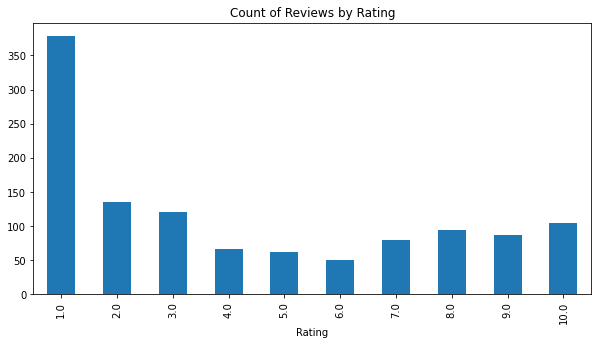

In [17]:
plot_review_stats(trip_verified_data,'Rating')

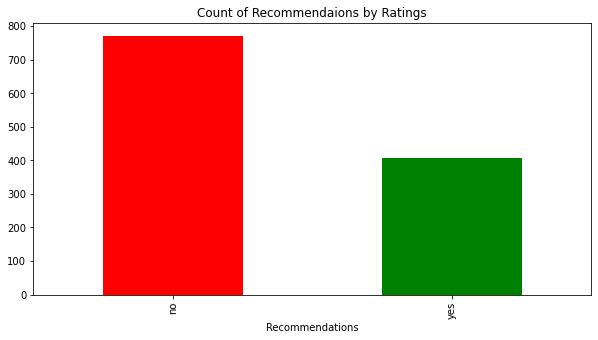

In [43]:
ax = trip_verified_data['Recommended'].value_counts().sort_index() \
    .plot(kind='bar',color=['red', 'green'],
          title='Count of Recommendaions by Ratings',
          figsize=(10, 5))
ax.set_xlabel('Recommendations')
plt.show()

In [19]:
def plot_highest_recommendations_by_column(data, column_name):
    # Filter DataFrame for 'yes' recommendations
    recommended_df = data[data['Recommended'] == 'yes']

    # Plot a bar graph based on the count of recommendations for each column
    ax = recommended_df[column_name].value_counts().plot(kind='bar',
                                                          title=f'Count of "Yes" Recommendations by {column_name}',
                                                          figsize=(15, 5))
    ax.set_xlabel(column_name)
    ax.set_ylabel('Number of Recommendations')
    plt.show()

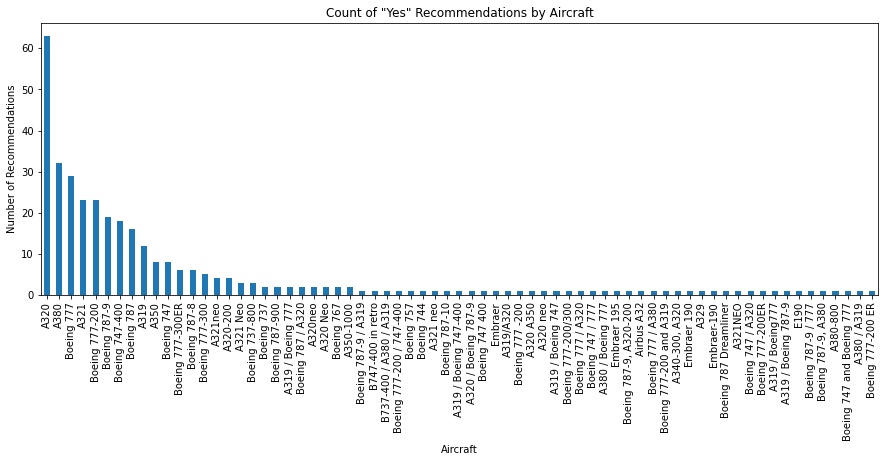

In [20]:
plot_highest_recommendations_by_column(trip_verified_data, 'Aircraft')

In [21]:
def plot_highest_non_recommendations_by_column(data, column_name):
    # Filter DataFrame for 'yes' recommendations
    recommended_df = data[data['Recommended'] == 'no']

    # Plot a bar graph based on the count of recommendations for each column
    ax = recommended_df[column_name].value_counts().plot(kind='bar',
                                                          title=f'Count of Not Recommended by {column_name}',
                                                          figsize=(15, 5))
    ax.set_xlabel(column_name)
    ax.set_ylabel('Number of Not Recommended')
    plt.show()

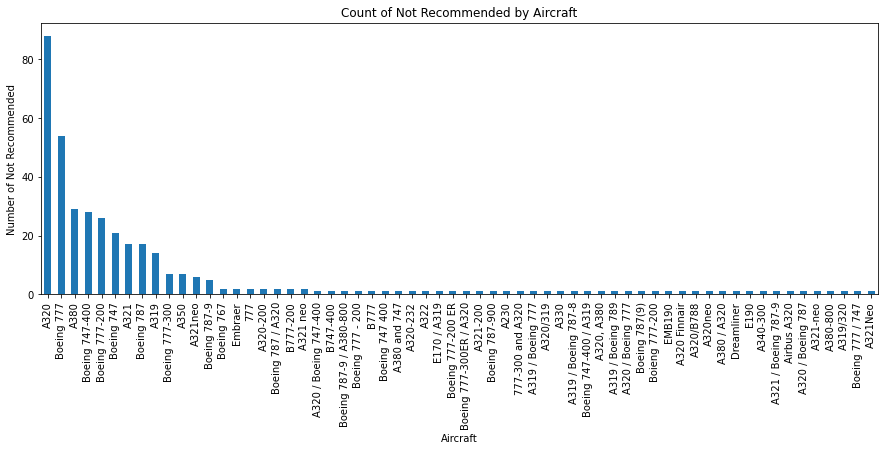

In [22]:
plot_highest_non_recommendations_by_column(trip_verified_data,'Aircraft')

BA's flies 65 A320's 42 777's 12 A380's 747's were grounded

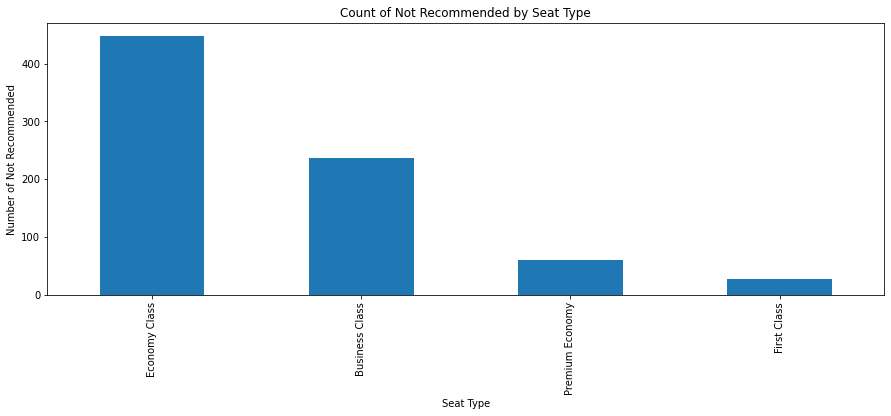

In [23]:
plot_highest_non_recommendations_by_column(trip_verified_data,'Seat Type')

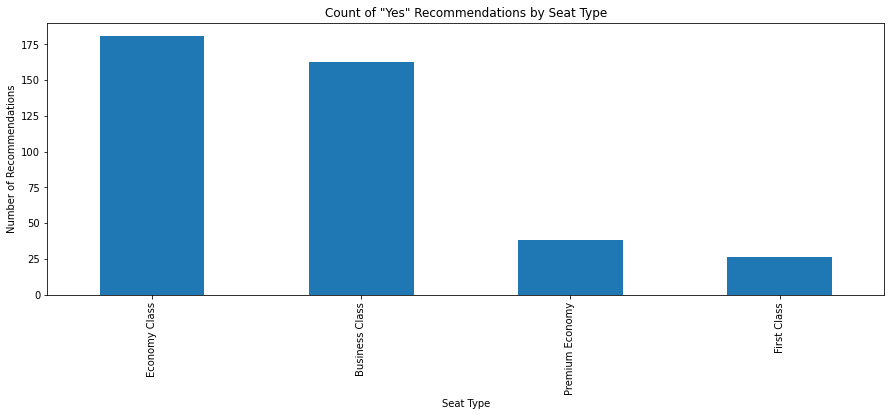

In [24]:
plot_highest_recommendations_by_column(trip_verified_data,'Seat Type')

<ipython-input-25-5452bbb97293>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date Flown'] = pd.to_datetime(data['Date Flown'])


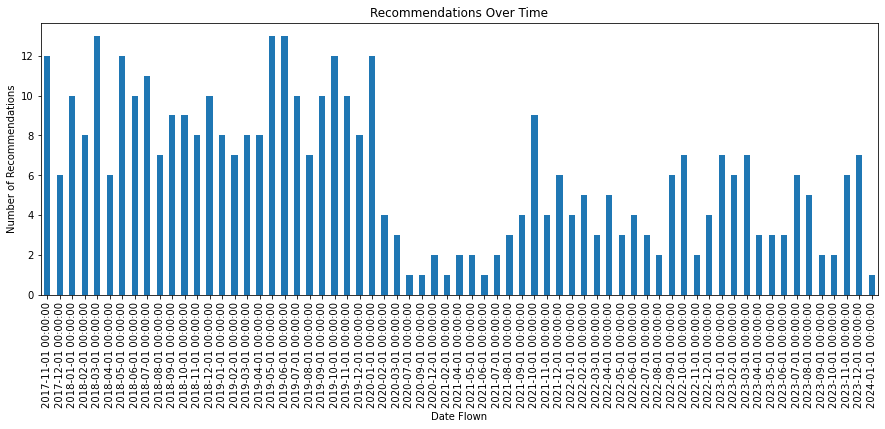

In [25]:
def plot_recommendations_over_time(data):
    # Convert the 'Date Flown' column to datetime type
    data['Date Flown'] = pd.to_datetime(data['Date Flown'])

    # Filter DataFrame for 'yes' recommendations
    recommended_df = data[data['Recommended'].str.lower() == 'yes']

    if not recommended_df.empty:
        # Group by 'Date Flown' and count the number of recommendations for each date
        recommendations_over_time = recommended_df.groupby('Date Flown').size()

        # Plot a bar graph
        recommendations_over_time.plot(kind='bar', figsize=(15, 5))
        plt.title('Recommendations Over Time')
        plt.xlabel('Date Flown')
        plt.ylabel('Number of Recommendations')
        plt.show()
    else:
        print("No data for 'Yes' recommendations.")

plot_recommendations_over_time(trip_verified_data)

<ipython-input-26-3d2407f78cbc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date Flown'] = pd.to_datetime(data['Date Flown'])
<ipython-input-26-3d2407f78cbc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Date Flown'].dt.year


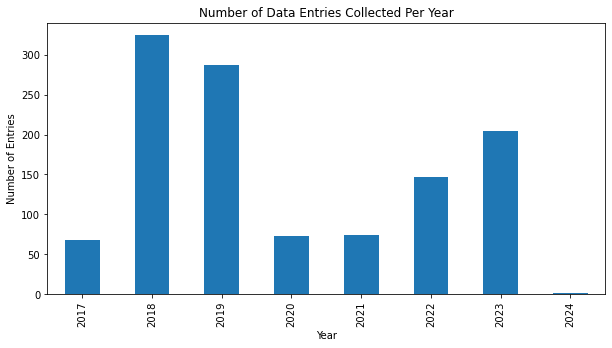

In [26]:
def data_collected_per_year(data):
    # Convert the 'Date Flown' column to datetime type
    data['Date Flown'] = pd.to_datetime(data['Date Flown'])

    # Extract the year from the 'Date Flown' column
    data['Year'] = data['Date Flown'].dt.year

    # Group by year and count the number of entries for each year
    entries_per_year = data.groupby('Year').size()

    # Plot a bar graph
    entries_per_year.plot(kind='bar', figsize=(10, 5))
    plt.title('Number of Data Entries Collected Per Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Entries')
    plt.show()

data_collected_per_year(trip_verified_data)

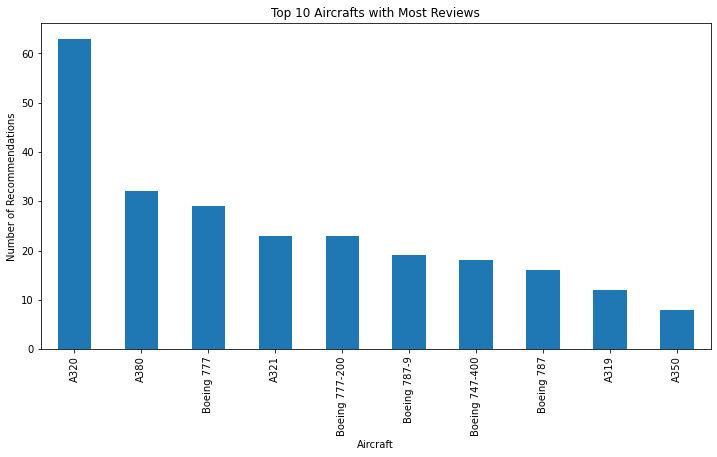

In [29]:
 #ratings vs aircrafts

def plot_top_aircrafts(data, top_n=10):
    # Filter DataFrame for 'yes' recommendations
    recommended_df = data[data['Recommended'].str.lower() == 'yes']

    if not recommended_df.empty:
        # Count the number of reviews for each aircraft
        aircraft_counts = recommended_df['Aircraft'].value_counts()

        # Select the top N aircrafts
        top_aircrafts = aircraft_counts.head(top_n)

        # Plot a bar graph
        top_aircrafts.plot(kind='bar', figsize=(12, 6))
        
        plt.title('Top 10 Aircrafts with Most Reviews')
        plt.xlabel('Aircraft')
        plt.ylabel('Number of Recommendations')
        plt.show()
    else:
        print("No data for 'Yes' recommendations.")
plot_top_aircrafts(trip_verified_data)

<ipython-input-36-8884e61ebe8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date Flown'] = pd.to_datetime(data['Date Flown'])


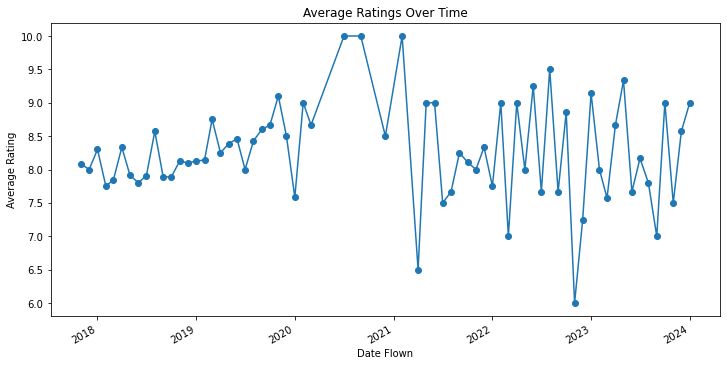

In [36]:
def plot_ratings_over_time(data):
    # Convert the 'Date Flown' column to datetime type
    data['Date Flown'] = pd.to_datetime(data['Date Flown'])

    # Filter DataFrame for 'yes' recommendations
    recommended_df = data[data['Recommended'].str.lower() == 'yes']

    if not recommended_df.empty:
        # Group by 'Date Flown' and calculate the average rating for each date
        average_ratings_over_time = recommended_df.groupby('Date Flown')['Rating'].mean()

        # Plot a line graph
        plt.figure(figsize=(12, 6))
        average_ratings_over_time.plot(kind='line', marker='o')
        
        plt.title('Average Ratings Over Time')
        plt.xlabel('Date Flown')
        plt.ylabel('Average Rating')
        plt.show()
    else:
        print("No data for 'Yes' recommendations.")

plot_ratings_over_time(trip_verified_data)

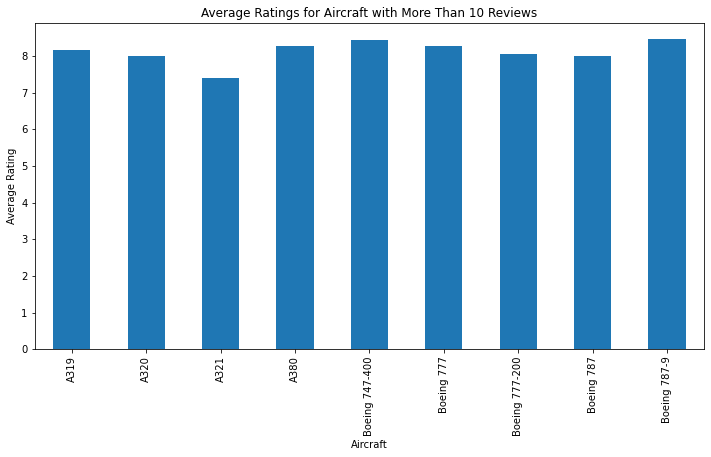

In [41]:

def plot_avg_ratings_for_popular_aircraft(data, min_reviews=10):
    # Filter DataFrame for 'yes' recommendations
    recommended_df = data[data['Recommended'].str.lower() == 'yes']

    if not recommended_df.empty:
        # Calculate the number of reviews for each aircraft
        reviews_by_aircraft = recommended_df['Aircraft'].value_counts()

        # Select aircraft with more than min_reviews reviews
        popular_aircraft = reviews_by_aircraft[reviews_by_aircraft > min_reviews].index

        # Filter DataFrame for popular aircraft
        popular_aircraft_df = recommended_df[recommended_df['Aircraft'].isin(popular_aircraft)]

        # Calculate the average rating for each popular aircraft
        avg_ratings_by_popular_aircraft = popular_aircraft_df.groupby('Aircraft')['Rating'].mean()

        # Plot a bar graph
        avg_ratings_by_popular_aircraft.plot(kind='bar', figsize=(12, 6))
        
        plt.title(f'Average Ratings for Aircraft with More Than {min_reviews} Reviews')
        plt.xlabel('Aircraft')
        plt.ylabel('Average Rating')
        plt.show()
    else:
        print("No data for 'Yes' recommendations.")

plot_avg_ratings_for_popular_aircraft(trip_verified_data)